# Prediction using Supervised ML
## Predicting the percentage of marks based on the number of study hours per day

Let's use Linear Regression Algorithm to predict our answer

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt          #importing the required libraries
import seaborn as sns
%matplotlib inline

In [15]:
url = 'http://bit.ly/w-data'
df = pd.read_csv(url)                    #reading the data and writing it to out data frame
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
df.info()                                #info of our data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
df.describe()                            #description of our data set

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


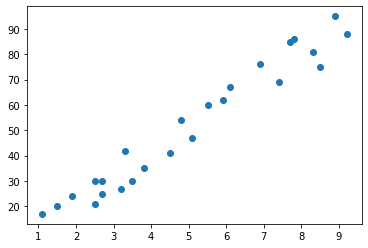

In [18]:
plt.scatter(df['Hours'], df['Scores'])

In [19]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


 We can see that there is a **high positive correlation** between **the #hours spent studying** and **scores obtained**.

Now let's get into the job of training the model. First, lets split our data as input variables (X) and output varibles (y).

In [20]:
X = df.drop('Scores', axis =1)
y = df['Scores']

Now, lets split our data into training set and test set.

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  #Splitting dataset (test & train)

Now, lets instatiate our **Linear Regression Model** and fit our training data to it.

In [22]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()                   # model (lm) is instatiated
lm.fit(X_train, y_train)                  # model (lm) is fit with the training data
lm.score(X_test, y_test)                  # Accuracy of our model ≈ 95%

0.9454906892105356

Let's plot our model predictions against the actual values.

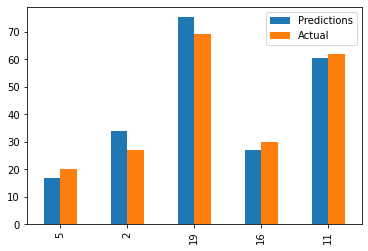

In [24]:
predictions = lm.predict(X_test)          #predictions of our model of our given test dataset

prediction_differences = pd.DataFrame({'Predictions' : predictions, 'Actual' : y_test})
prediction_differences.plot(kind = 'bar')

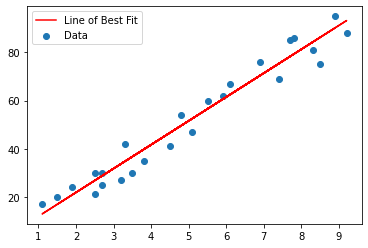

In [25]:
line = lm.coef_*X + lm.intercept_
plt.scatter(X, y)
plt.plot(X,line,'r')
plt.legend(['Line of Best Fit', 'Data'])

In [30]:
print('Slope of the line is',*lm.coef_)                          
print('Intercept of the line is', lm.intercept_)                      

Slope of the line is 9.910656480642237
Intercept of the line is 2.018160041434683


Let's look at the different types of error values of our predictions.

In [26]:
from sklearn import metrics
import math

print('The Mean Absolute Error of our predictions is {}'.format(metrics.mean_absolute_error(y_test, predictions)))
print('The Mean Squared Error of our predictions is {}'.format(metrics.mean_squared_error(y_test, predictions)))
print('The Root Mean Squared Error of our predictions is {}'.format(math.sqrt(metrics.mean_squared_error(y_test, predictions))))

The Mean Absolute Error of our predictions is 4.183859899002975
The Mean Squared Error of our predictions is 21.5987693072174
The Root Mean Squared Error of our predictions is 4.6474476121003665


Therefore, the hypothesis of our model can we written as:<br> 
> y = mx + c <br> 
>>where, 
>> y = predicted value,<br> 
&emsp; &emsp; &ensp;m = coefficient (slope),<br>
&emsp; &emsp; &ensp; c = intercept<br>
<br>
>&emsp; &emsp; &ensp;i.e., Coefficienct = marks obtained per 1 hour of study per day<br>
>&emsp; &emsp; &ensp;&emsp;&ensp;&nbsp; Intercept &nbsp;&nbsp;&nbsp;&nbsp;= marks obtained without studying 


Finally, lets predict the percentage of marks obtained for #Study hours as asked in the question

In [27]:
try:
    hours = float(input('Enter #Study Hours / Day : '))
    print('Percentage of marks obtained = {:.2f}'.format(*lm.predict([[hours]])))
except:
    print('Please enter a valid number')
    pass

Please enter a valid number
